# Investigating Covid-19 Virus Trends (January 2020 - July 2020)

## Project Overview
For this project will investigate the trends of a Coronavirus in different countries covering a period from January 2020 to July 2020. Coronavirus has been in existence for over 5 years and there is a lot of data on how the virus has evolved as well as on how countries have been affected. However, in our project we will only be interested in understanding the trends for the first 6 months of the virus's  existence in the world. We will use a dataset that was downloaded from kaggle.com.
## Project Questions
Our analysis will be designed to find answers to the following questions:
1. Which countries have had the highest number of deaths due to COVID-19?
2. Which countries have had the highest number of positive cases against the number of tests?
3. Which countries have made the best effort in terms of the number of COVID-19 tests conducted related to their population?
4. Which countries were ultimately the most and the least affected related their population?
## Import Libraries and Rean in Data
We will first import the necessary Python Libraries that will be used for this project then we load the data.

In [1]:
# Import Pandas and Numpy for data manipulation and wrangling
import pandas as pd
import numpy as np

# Import matplotlib and seaborn for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Read in Data
covid = pd.read_csv('covid_19.csv')

# Display the first five records of the data
covid.head()

,Date,Continent_Name,Two_Letter_Country_Code,Country_Region,Province_State,positive,hospitalized,recovered,death,total_tested,active,hospitalizedCurr,daily_tested,daily_positive
0,2020-01-20,Asia,KR,South Korea,All States,1,0,0,0,4,0,0,0,0
1,2020-01-22,North America,US,United States,All States,1,0,0,0,1,0,0,0,0
2,2020-01-22,North America,US,United States,Washington,1,0,0,0,1,0,0,0,0
3,2020-01-23,North America,US,United States,All States,1,0,0,0,1,0,0,0,0
4,2020-01-23,North America,US,United States,Washington,1,0,0,0,1,0,0,0,0


## Data Understanding
Now that we have successfully loaded our dataset, its time we take steps to understand the structure and basic characteristics of the data. 
### Inspect the Data
We have already the viewed the first five records of our dataset, now we will check the number of rows and columns of our data.

In [2]:
shape = covid.shape
print(f"Our dataset has {shape[0]} rows and {shape[1]} columns.")

Our dataset has 10903 rows and 14 columns.


### Understanding the Variables
Here we will identify the types of variables and identify variables with missing values. We will also give a brief explanation corresponding to ech variable.

In [3]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10903 entries, 0 to 10902
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Date                     10903 non-null  object
 1   Continent_Name           10903 non-null  object
 2   Two_Letter_Country_Code  10903 non-null  object
 3   Country_Region           10903 non-null  object
 4   Province_State           10903 non-null  object
 5   positive                 10903 non-null  int64 
 6   hospitalized             10903 non-null  int64 
 7   recovered                10903 non-null  int64 
 8   death                    10903 non-null  int64 
 9   total_tested             10903 non-null  int64 
 10  active                   10903 non-null  int64 
 11  hospitalizedCurr         10903 non-null  int64 
 12  daily_tested             10903 non-null  int64 
 13  daily_positive           10903 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 1

Our dataset has **10903** rows and **14** columns as stipulated in the table above. The DataFrame do not have missing values. It has 5 columns of the type **object** (strings) and 9 columns of the type **inte64** which are typically **integers**. The following is a breakdown of the column names and an explanation of what they are:
1. `Date`: Date.
2. `Continent_Name`: Continent names.
3. `Two_Letter_Country_Code`: Country codes.
4. `Country_Region`: Country names.
5. `Province_State`: States/province names; value is All States when state/provincial level data is not available.
6. `positive`: Cumulative number of positive cases reported.
7. `hospitalized`: Cumulative number of hospitalized cases reported.
8. `recovered`: Cumulative number of recovered cases reported.
9. `death`: Cumulative number of deaths reported.
10. `total_tested`: Cumulative number of tests conducted.
11. `active`: Number of actively cases on that day.
12. `hospitalizedCurr`: Number of actively hospitalized cases on that day.
13. `daily_tested`: Number of tests conducted on the day; if daily data is unavailable, daily tested is averaged across number of days in between.
14. `daily_positive`: Number of positive cases reported on the day; if daily data is unavailable, daily positive is averaged across number of days in.
### Check for Duplicates.
We will check if our dataset has duplicated records.

In [4]:
covid.duplicated().sum()

0

Our dataset do not have duplicates.
### Summary Statistics
Having checked for missing values and duplicates, we have found none of course, let us go ahead and display the summary statistics in order to have a general overview of the statistical makeup of our data. 

In [5]:
# Summary Statistics for numeric columns
covid.describe()

,positive,hospitalized,recovered,death,total_tested,active,hospitalizedCurr,daily_tested,daily_positive
count,1.090300e+04,10903.000000,10903.000000,10903.000000,1.090300e+04,10903.000000,10903.000000,10903.000000,10903.000000
mean,1.776802e+04,766.402550,2409.220490,947.592956,1.954757e+05,4472.194717,454.074475,6841.403283,497.884619
std,9.314346e+04,5626.325766,11254.209177,5507.242206,8.190222e+05,22277.479931,2253.045376,27198.457892,2354.834051
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,-2.000000,0.000000,-330230.000000,-4735.000000
25%,4.400000e+01,0.000000,0.000000,0.000000,2.147500e+03,0.000000,0.000000,71.000000,1.000000
50%,1.026000e+03,0.000000,0.000000,6.000000,3.035800e+04,0.000000,0.000000,1048.000000,29.000000
75%,7.440000e+03,0.000000,500.500000,136.000000,1.252850e+05,660.500000,28.000000,4688.500000,264.000000
max,1.783570e+06,89590.000000,171883.000000,98536.000000,1.693689e+07,280931.000000,33004.000000,492276.000000,63047.000000


In [6]:
# Summary Statistics for qualitative columns
covid.describe(include = ['object'])

,Date,Continent_Name,Two_Letter_Country_Code,Country_Region,Province_State
count,10903,10903,10903,10903,10903
unique,133,6,109,109,81
top,2020-05-05,North America,US,United States,All States
freq,142,6452,5032,5032,3781


## Data Cleaning
Before we begin figuring out answers to our questions, it is necessary to do some data cleaning. We have no missing values to deal with and no duplicate values to drop. Our data cleaning will dwell much on making the column names formated in a way that will be easy to work with, filtering our data to only include rows necessary for our analysis, droping columns that will not be used in our project and changing the `Date` column data type from **object** to **DateTime**. 
### Cleaning column names
Let us format the column names so that they become consistent and easy to read and work with. 

In [7]:
covid.columns = covid.columns.str.lower()
covid.rename(columns = {'hospitalizedcurr': 'hospitalized_curr'}, inplace = True)
covid.columns

Index(['date', 'continent_name', 'two_letter_country_code', 'country_region',
       'province_state', 'positive', 'hospitalized', 'recovered', 'death',
       'total_tested', 'active', 'hospitalized_curr', 'daily_tested',
       'daily_positive'],
      dtype='object')

### Change `date` column datatype
We will change `date` to **datetime** datatype.

In [8]:
covid['date'] = pd.to_datetime(covid['date'])
print(covid['date'].dtype)

datetime64[ns]


### Isolating the Data we need
We will filter our dataset to include only records that we need. After viewing the first five records of our dataset, one could easily see that `province_state` column has columns for **all states** and data for individual states. For example, data for the **United States**, there is data for all states combined and data points for individual states like Washington. Conducting our analysis with such a dataset would introduce bias. Therefore, we will filter our dataset to only include records at a **country** level. We serve our filtered data to a variable **covid_all_states**.

In [9]:
# All states data
covid_all_states = covid[covid['province_state'] == 'All States'].reset_index(drop = True)
covid_all_states.shape

(3781, 14)

After filtering our dataset to include data at a **country** level, the number of records for our data has reduced from **10, 903** to **3, 781**. Even though we can work with this dataset to find trends and relationships for cummulative variables and then for daily variables, we will choose to divide our dataset into two DataFrames, one related to daily measures which will be called **covid_all_states_daily** and the other related to cummulative measures which will go by the name of **covid_all_states_cummulative**.

In [13]:
# Columns related to cummulative measures
covid_all_states_cummulative = covid_all_states[['date', 'continent_name', \
                                                 'two_letter_country_code', 'positive',\
                                                 'hospitalized', 'recovered', 'death', 'total_tested']]

# Columns related to daily measures
covid_all_states_daily = covid_all_states[['date', 'country_region', 'active', 'hospitalized_curr', 'daily_tested', 'daily_positive']]

# View the dimensions of the the datasets to confirm if filtering has been successful
print(covid_all_states_cummulative.shape, covid_all_states_daily.shape, sep='\n')

(3781, 8)
(3781, 6)


Now that we have isolated our data to only inclide data points that we need for our analysis, it is time we start answering our questions. 
## Identifying Countries with the highest number of Deaths
To identify countries with the highest number of deaths, we will first group **covid_all_states_cummulative** DataFrame by `two_letter_country_code` in order to view the maximum values for cummulative deaths for each country. Our focus is to find the top ten countries with highest numbers of cummulative deaths. We will first display our results in a table, then we will plot a horizontal bar chart for the same.

In [24]:
# A pivot table for cummulative deaths by country
covid_deaths_cum = covid_all_states_cummulative.\
pivot_table(values = 'death', index = 'two_letter_country_code', aggfunc = 'max').sort_values(by = 'death', ascending = False).head(10)
covid_deaths_cum.index = ['United States', 'Italy', 'Great Britain', 'Belgium', 'Russua', 'Turkey', 'Sweden', 'Canada', 'New Zealand', 'Poland']
covid_deaths_cum.columns = ['Cummulative Deaths']
covid_deaths_cum

,Cummulative Deaths
United States,98536
Italy,33415
Great Britain,33186
Belgium,8903
Russua,4693
Turkey,4540
Sweden,4395
Canada,3682
New Zealand,1421
Poland,1065


From the table above, we can easily see that the country with the highest number of deaths cummulatively is the **United States of America** seconded by **Italy**. Let us now visualize our table.

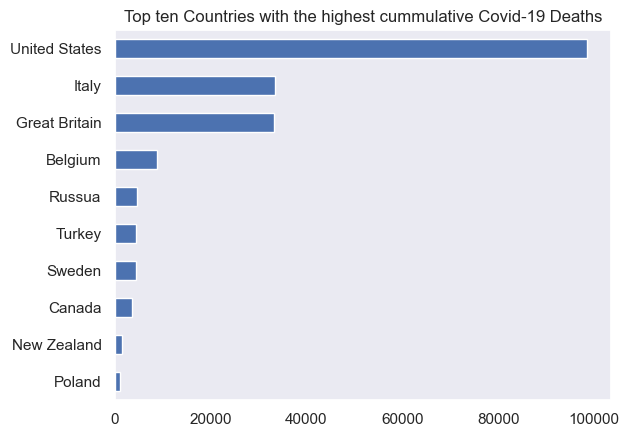

In [32]:
covid_deaths_cum.sort_values(by='Cummulative Deaths').plot(kind = 'barh', legend = False)
plt.grid(False)
plt.title('Top ten Countries with the highest cummulative Covid-19 Deaths')
plt.show()